# Exploratory Data Analysis

# Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.

# Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

These questions will be focusing on full-time Data Analyst roles in Germany. 

# Exploratory Data Analysis for all Data Roles

Roles to Explore

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

c:\Users\49157\anaconda3\envs\dataenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_DE = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst') & (df['job_schedule_type'] == 'Full-time')]
df_DA_DE

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
141,Data Analyst,Data Analyst & Process Developer (m/w/d),"Mettlach, Germany",via WTRF Jobs,Full-time,False,Germany,2023-05-02 13:24:54,True,False,Germany,None,NaN,NaN,Villeroy & Boch AG Hauptverwaltung,"[typescript, html, css, javascript, angular, sap]","{'analyst_tools': ['sap'], 'programming': ['ty..."
142,Data Analyst,Data Analyst (m/f/d),"Nuremberg, Germany",via Big Country Jobs,Full-time,False,Germany,2023-01-19 14:05:05,False,False,Germany,None,NaN,NaN,Symanto,"[python, r, sql, azure, power bi, excel, power...","{'analyst_tools': ['power bi', 'excel', 'power..."
220,Data Analyst,Inhouse Junior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-21 14:02:06,True,False,Germany,None,NaN,NaN,NEW YORKER Group-Services International GmbH &...,[windows],{'os': ['windows']}
378,Data Analyst,Werkstudent (m/f/d) Data Analyst,"Hamburg, Germany",via Indeed,Full-time,False,Germany,2023-07-13 13:10:44,True,False,Germany,None,NaN,NaN,LetMeShip,"[python, r, sql, express]","{'programming': ['python', 'r', 'sql'], 'webfr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783636,Data Analyst,Data Analyst,Germany,via BeBee,Full-time,False,Germany,2023-09-09 07:01:50,True,False,Germany,None,NaN,NaN,STRATO Personal GmbH,[sap],{'analyst_tools': ['sap']}
784481,Data Analyst,Data Analyst,"Überlingen, Germany",via BeBee,Full-time,False,Germany,2023-09-28 06:15:04,True,False,Germany,None,NaN,NaN,Schmieder GmbH,None,None
784650,Data Analyst,Data Analyst Vollzeit,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-05 06:33:26,True,False,Germany,None,NaN,NaN,Asgoodasnew,"[javascript, gdpr, github, jira, confluence]","{'async': ['jira', 'confluence'], 'libraries':..."
785168,Data Analyst,Data Analyst COO Business Management,Germany,via BeBee,Full-time,False,Germany,2023-11-09 06:38:25,False,False,Germany,None,NaN,NaN,EON Energie Deutschland,"[sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."


Text(0, 0.5, 'Location')

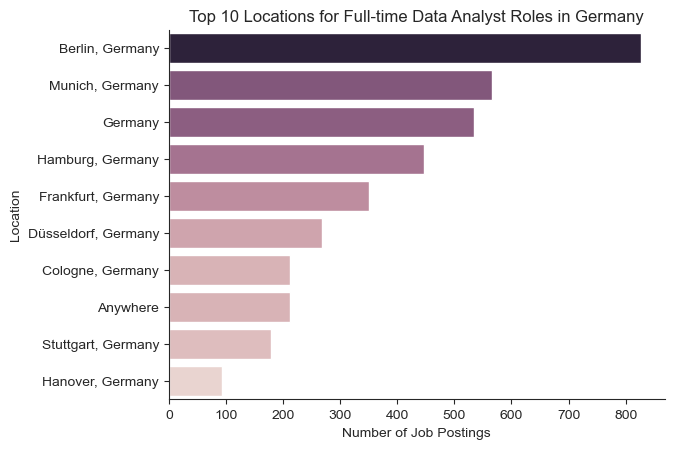

In [17]:
df_plot = df_DA_DE['job_location'].value_counts().head(10).to_frame()
df_plot
sns.set_style(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False)
sns.despine()
plt.title('Top 10 Locations for Full-time Data Analyst Roles in Germany')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')


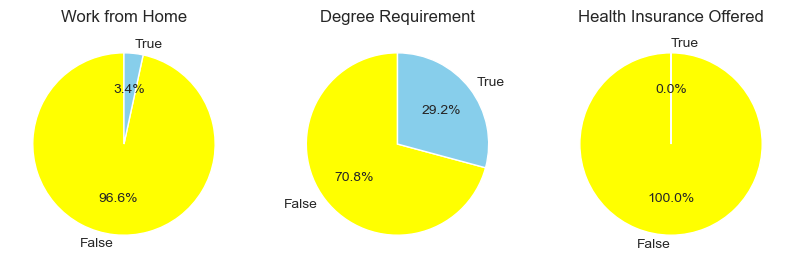

In [28]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(10, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_DE[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'], colors=['yellow', 'skyblue'])
    ax[i].set_title(title)

plt.show()

Text(0, 0.5, 'Location')

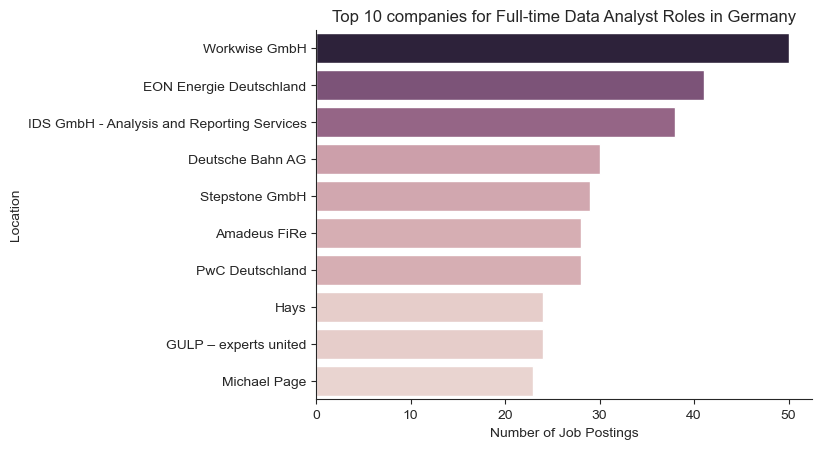

In [21]:
df_plot = df_DA_DE['company_name'].value_counts().head(10).to_frame()
df_plot
sns.set_style(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', legend=False)
sns.despine()
plt.title('Top 10 companies for Full-time Data Analyst Roles in Germany')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')